In [1]:
import os 
from itertools import cycle
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import validation_curve

import comptools as comp
from submit_feature_scan import scan_features

color_dict = comp.color_dict

%matplotlib inline

In [2]:
config = 'IC86.2012'
num_groups = 2
# pipeline = 'BDT'
pipeline = 'xgboost'
energybins = comp.get_energybins()
comp_list = comp.get_comp_list(num_groups=num_groups)
nominal_features, _ = comp.get_training_features()
nominal_features

['lap_cos_zenith', 'log_s125', 'log_dEdX']

In [3]:
pipeline_str = '{}_comp_{}_{}-groups'.format(pipeline, config, num_groups)
pipeline_str

'xgboost_comp_IC86.2012_2-groups'

In [4]:
pattern = os.path.join(os.getcwd(),
                       'feature_scan_results',
                       '{}_{}-groups-*'.format(pipeline, num_groups))
files = glob.glob(pattern)
records = [joblib.load(results_file) for results_file in files]
results = pd.DataFrame.from_records(records)

Add number of features column 

In [5]:
results['num_features'] = results.features.apply(len)

In [6]:
results.head()

,acc_mean_heavy,acc_mean_light,acc_std_heavy,acc_std_light,best_params,config,feature_labels,features,log_energy_bins,num_groups,pipeline,pipeline_name,sklearn_version,source_code,target,num_features
0,"[0.614403610600718, 0.7314373044146879, 0.7864...","[0.704407927543691, 0.721172189397806, 0.62801...","[0.05278240203011875, 0.045354542606296004, 0....","[0.0308395197781793, 0.037730530906592154, 0.0...","{u'classifier__learning_rate': 0.025, u'classi...",IC86.2012,"($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...","(lap_cos_zenith, log_s125, log_dEdX, avg_inice...","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipeline(memory=None,\n steps=[('classifie...",xgboost_comp_IC86.2012_2-groups,0.19.1,/home/jbourbeau/cr-composition/feature_selecti...,"(c, o, m, p, _, t, a, r, g, e, t, _, 2)",5
1,"[0.631458215814262, 0.7250107429133178, 0.7785...","[0.7422502583363462, 0.7412764250330443, 0.665...","[0.041651074969273914, 0.03631277567869169, 0....","[0.03558543463984627, 0.04416824170352989, 0.0...","{u'classifier__learning_rate': 0.05, u'classif...",IC86.2012,"($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...","(lap_cos_zenith, log_s125, log_dEdX, IceTopLLH...","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipeline(memory=None,\n steps=[('classifie...",xgboost_comp_IC86.2012_2-groups,0.19.1,/mnt/home/jbourbeau/cr-composition/feature_sel...,"(c, o, m, p, _, t, a, r, g, e, t, _, 2)",4
2,"[0.5924131081084015, 0.7348213828966831, 0.781...","[0.7072848425653039, 0.7013158167302425, 0.594...","[0.054766193932432504, 0.04248569556119729, 0....","[0.044536970651882654, 0.06001765158758608, 0....","{u'classifier__learning_rate': 0.01, u'classif...",IC86.2012,"($\log_{10}(S_{\mathrm{125}})$, $\mathrm{\log_...","(log_s125, log_dEdX, random)","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipeline(memory=None,\n steps=[('classifie...",xgboost_comp_IC86.2012_2-groups,0.19.1,/home/jbourbeau/cr-composition/feature_selecti...,"(c, o, m, p, _, t, a, r, g, e, t, _, 2)",3
3,"[0.6488136325346698, 0.7702742302786096, 0.786...","[0.7642004309602, 0.7316221835149157, 0.667505...","[0.05175524883173869, 0.05486009849730478, 0.0...","[0.023843470741821082, 0.030384460378712192, 0...","{u'classifier__learning_rate': 0.05, u'classif...",IC86.2012,"($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...","(lap_cos_zenith, log_s125, log_dEdX, NChannels...","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipeline(memory=None,\n steps=[('classifie...",xgboost_comp_IC86.2012_2-groups,0.19.1,/home/jbourbeau/cr-composition/feature_selecti...,"(c, o, m, p, _, t, a, r, g, e, t, _, 2)",9
4,"[0.6298156137746151, 0.7225656118983906, 0.770...","[0.7355466978377615, 0.7413106215932534, 0.672...","[0.04356304188666882, 0.03639204325908568, 0.0...","[0.03808662563538498, 0.042827579327096424, 0....","{u'classifier__learning_rate': 0.2, u'classifi...",IC86.2012,"($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...","(lap_cos_zenith, log_s125, log_dEdX, IceTopLLH...","[6.1, 6.199999999999999, 6.299999999999999, 6....",2,"Pipeline(memory=None,\n steps=[('classifie...",xgboost_comp_IC86.2012_2-groups,0.19.1,/home/jbourbeau/cr-composition/feature_selecti...,"(c, o, m, p, _, t, a, r, g, e, t, _, 2)",5


In [8]:
def format_label(label, labels):
    
    # Check that label is in labels
    has_label = any([True if label in l else False for l in labels])
    if not has_label:
        return labels
    
    removed = [l for l in labels if label not in l]
    formatted_label = '\\{' + label + '\\}'
    formatted_labels = removed + [formatted_label]
    
    return formatted_labels

In [9]:
has_random_features = results.features.apply(lambda x: 'random' in x).values
results_no_random = results.loc[~has_random_features].reset_index(drop=True)

4
('lap_cos_zenith', 'log_s125', 'log_dEdX', 'IceTopLLHRatio')
{'classifier__learning_rate': 0.05, 'classifier__n_estimators': 400, 'classifier__max_depth': 4}
3
('lap_cos_zenith', 'log_s125', 'IceTopLLHRatio')
{'classifier__learning_rate': 0.05, 'classifier__n_estimators': 400, 'classifier__max_depth': 4}
3
('lap_cos_zenith', 'log_s125', 'log_dEdX')
{'classifier__learning_rate': 0.025, 'classifier__n_estimators': 250, 'classifier__max_depth': 7}


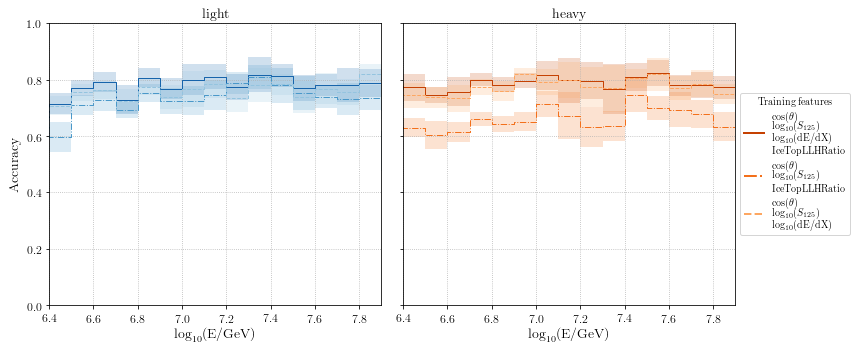

In [11]:
cwd = os.getcwd()
linestyles = cycle(['-', '-.', '--', ':'])


plot_features = [('lap_cos_zenith', 'log_s125', 'IceTopLLHRatio'),
                 ('lap_cos_zenith', 'log_s125', 'log_dEdX'),
                 ('lap_cos_zenith', 'log_s125', 'log_dEdX', 'IceTopLLHRatio'),
#                  ('lap_cos_zenith', 'log_s125'),
                ]

results_plot = results_no_random.loc[results_no_random['features'].isin(plot_features), :].reset_index(drop=True)

color_dict_model = {}
color_dict_model['light'] = sns.color_palette('Blues', len(results_plot)+1).as_hex()[::-1]
color_dict_model['intermediate'] = sns.color_palette('Reds', len(results_plot)+1).as_hex()[::-1]
color_dict_model['heavy'] = sns.color_palette('Oranges', len(results_plot)+1).as_hex()[::-1]

color_dict_model['PPlus'] = sns.color_palette('Blues', len(results_plot)+1).as_hex()[::-1]
color_dict_model['O16Nucleus'] = sns.color_palette('Reds', len(results_plot)+1).as_hex()[::-1]
color_dict_model['He4Nucleus'] = sns.color_palette('Purples', len(results_plot)+1).as_hex()[::-1]
color_dict_model['Fe56Nucleus'] = sns.color_palette('Oranges', len(results_plot)+1).as_hex()[::-1]

fig, axarr = plt.subplots(ncols=len(comp_list), figsize=(12, 5), sharex=True, sharey=True)
for idx_row, row in results_plot.iterrows():
    
    if 'random' in row['features']:
        continue
        
#     if len(row['features']) > 4:
#         continue
        
#     if len(row['features']) == 2:
#         continue
        
#     if len(row['features']) != 3:
#         continue
    

#     if len(row['features']) != 2 and set(row['features']) != set(nominal_features):
#         continue

#     if set(row['features']) != set(nominal_features):
#         continue
        
    print(len(row['features']))
    print(row['features'])
    print(row['best_params'])
    
    ls = next(linestyles)
    for idx, (composition, ax) in enumerate(zip(comp_list, axarr.flat)):
        labels = row['feature_labels']
        formatted_labels = format_label('NChannels', labels)
        formatted_labels = format_label('NHits', formatted_labels)
        formatted_labels = format_label('IT Q', formatted_labels)
        # Add to plot
        comp.plot_steps(energybins.log_energy_bins,
                        row['acc_mean_{}'.format(composition)],
                        yerr=row['acc_std_{}'.format(composition)],
#                         color=color_dict[composition],
                        color=color_dict_model[composition][idx_row],
                        ls=ls,
                        label='\n '.join(formatted_labels),
                        ax=ax)

        ax.set_xlim(6.4, 7.9)
        ax.set_ylim(0, 1)
        ax.set_xlabel('$\mathrm{\log_{10}(E/GeV)}$')
        if idx == 0:
            ax.set_ylabel('Accuracy')
        ax.set_title(composition)
        ax.grid(lw=0.8)
        if idx == len(comp_list) - 1:
#             ax.legend(title='Training features', fontsize=10)
            leg = ax.legend(title='Training features',
                            loc='center left',
                            ncol=1,
                            bbox_to_anchor=(1, 0.5),
                            fontsize=10)
# Set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)
    
# ax.legend(title='Training features', loc='lower left', fontsize=10)
outfile = os.path.join(comp.paths.figures_dir, 
                       'model_evaluation',
                       'new_features',
                       '{}_num_groups-{}.png'.format(config, num_groups))
comp.check_output_dir(outfile)
plt.savefig(outfile)
plt.show()

In [97]:
# cwd = os.getcwd()
# linestyles = ['-', '-.', '--']
# fig, axarr = plt.subplots(ncols=len(comp_list), figsize=(12, 5), sharex=True, sharey=True)
# for features, ls in zip(scan_features, linestyles):
#     features_str = '-'.join(features)
#     results_basename = '{}-{}.pkl'.format(pipeline_str, features_str)
#     results_file = os.path.join(cwd,
#                                 'feature_scan_results',
#                                 results_basename)
#     results = joblib.load(results_file)
#     print(results['best_params'])

#     for idx, (composition, ax) in enumerate(zip(comp_list, axarr.flat)):
#         labels = results['feature_labels']
#         formatted_labels = [] 
#         nchannels_flag = False
#         for label in labels:
#             if 'NChannels' in label:
#                 if not nchannels_flag:
#                     formatted_labels.append('\{NChannels\}')
#                     nchannels_flag = True
#                 else:
#                     continue
#             else:
#                 formatted_labels.append(label)
#         # Add to plot
#         comp.plot_steps(energybins.log_energy_bins,
#                         results['acc_mean_{}'.format(composition)],
#                         yerr=results['acc_std_{}'.format(composition)],
#                         color=color_dict[composition],
#                         ls=ls,
# #                         label=', '.join(results['feature_labels']),
#                         label='\n '.join(formatted_labels),
#                         ax=ax)

#         ax.set_xlim(6.4, 7.9)
#         ax.set_ylim(0, 1)
#         ax.set_xlabel('$\mathrm{\log_{10}(E/GeV)}$')
#         if idx == 0:
#             ax.set_ylabel('Accuracy')
#         ax.set_title(composition)
#         ax.grid(lw=0.8)
# #         if idx == len(comp_list) - 1:
# # #             ax.legend(title='Training features', fontsize=10)
# #             ax.legend(title='Training features', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
# # ax.legend(title='Training features', loc='lower left', fontsize=10)
# outfile = os.path.join(comp.paths.figures_dir, 
#                        'model_evaluation',
#                        'new_features',
#                        '{}_num_groups-{}.png'.format(config, num_groups))
# comp.check_output_dir(outfile)
# plt.savefig(outfile)
# plt.show()

In [54]:
def plot_feature_importances(feature_importances, feature_labels):
    num_features = len(feature_labels)
    importances = feature_importances
    indices = np.argsort(importances)[::-1]

    fig, ax = plt.subplots()
    for f in range(num_features):
        print('{}) {}'.format(f + 1, importances[indices[f]]))

    plt.ylabel('Feature Importances')
    plt.bar(range(num_features),
            importances[indices],
            align='center')

    plt.xticks(range(num_features),
               feature_labels[indices],
               rotation=90)
    plt.xlim([-1, num_features])
    # plt.ylim([0, .40])
    ax.grid(axis='y')
    plt.show()

1) 0.23421253264
2) 0.227217122912
3) 0.219686537981
4) 0.177178904414
5) 0.141704887152


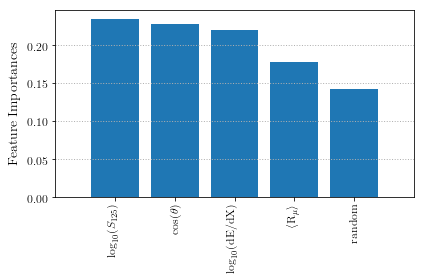

1) 0.312594264746
2) 0.269984930754
3) 0.21625187993
4) 0.20116892457


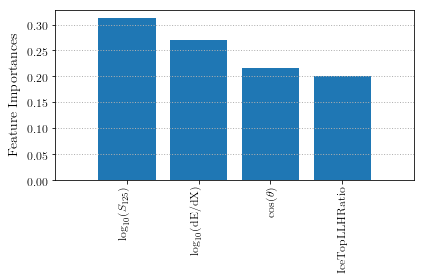

1) 0.397560179234
2) 0.397345542908
3) 0.205094262958


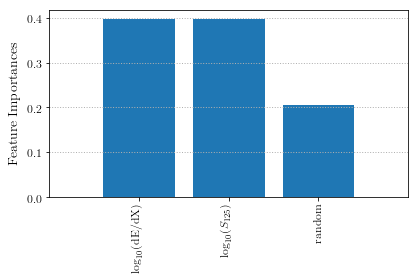

1) 0.202100500464
2) 0.159452244639
3) 0.159046068788
4) 0.140826269984
5) 0.102820008993
6) 0.0811187177896
7) 0.0608100257814
8) 0.0511779040098
9) 0.0426482520998


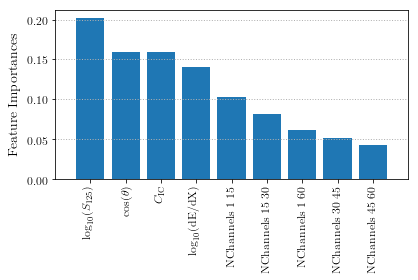

1) 0.263640999794
2) 0.246302902699
3) 0.19530852139
4) 0.180010199547
5) 0.114737376571


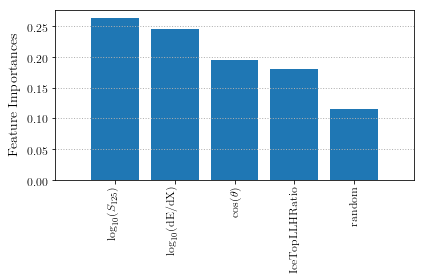

1) 0.273294597864
2) 0.268969148397
3) 0.250247627497
4) 0.207488611341


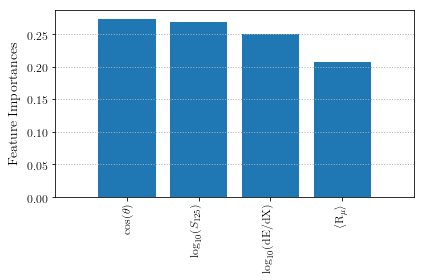

1) 0.24767178297
2) 0.153788074851
3) 0.149509191513
4) 0.135665744543
5) 0.0994210913777
6) 0.0707274079323
7) 0.0503397919238
8) 0.0367480479181
9) 0.0309589728713
10) 0.0251698959619


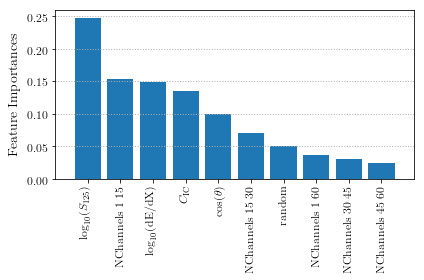

1) 0.51054507494
2) 0.489454954863


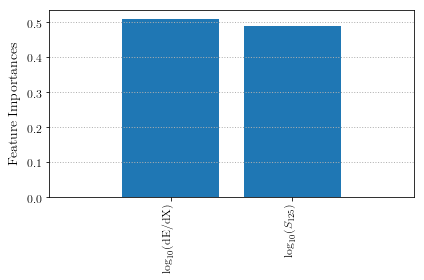

1) 0.202626645565
2) 0.14427767694
3) 0.130956843495
4) 0.0928705409169
5) 0.0829268321395
6) 0.0793621018529
7) 0.0711069405079
8) 0.0662288963795
9) 0.0487804859877
10) 0.0358348973095
11) 0.0275797378272
12) 0.0136960595846
13) 0.00375234521925


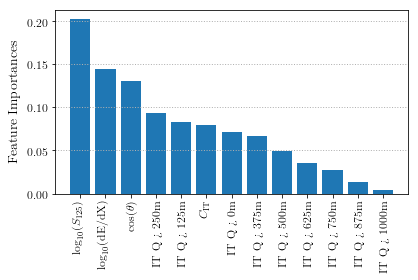

1) 0.397478997707
2) 0.38117647171
3) 0.221344530582


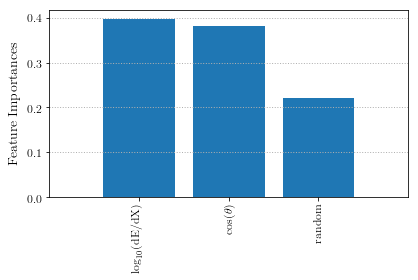

1) 0.189975649118
2) 0.154339194298
3) 0.125624924898
4) 0.122292011976
5) 0.114023841918
6) 0.103961028159
7) 0.0698628351092
8) 0.0668504014611
9) 0.0530701205134


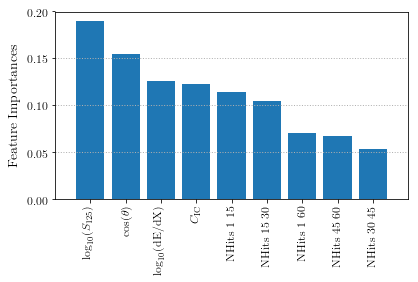

1) 0.501763641834
2) 0.498236328363


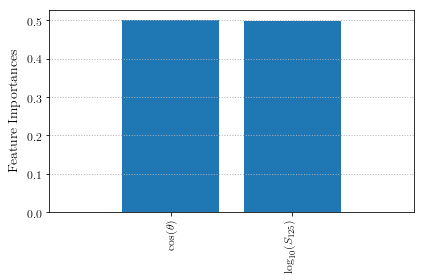

1) 0.316953331232
2) 0.269818991423
3) 0.26691070199
4) 0.146317005157


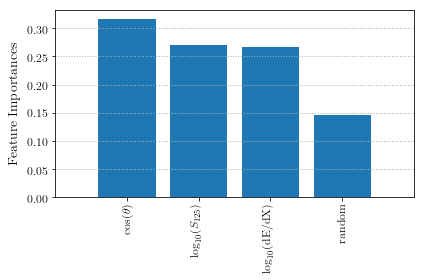

1) 0.376389741898
2) 0.315140485764
3) 0.308469772339


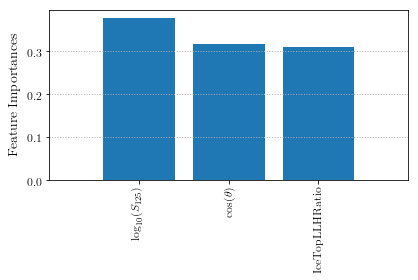

1) 0.175836578012
2) 0.140431135893
3) 0.118561223149
4) 0.11273342371
5) 0.104524374008
6) 0.092304803431
7) 0.0793332532048
8) 0.064607091248
9) 0.0634164661169
10) 0.0482516624033


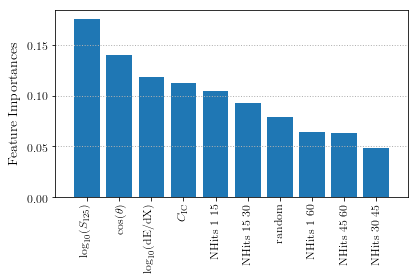

1) 0.522927939892
2) 0.477072060108


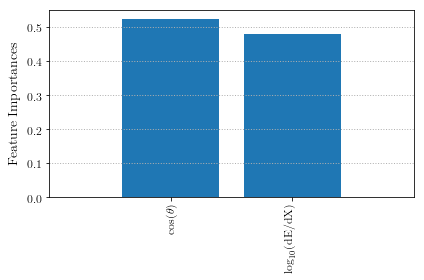

1) 0.152215331793
2) 0.137191668153
3) 0.123853594065
4) 0.090456046164
5) 0.0777461379766
6) 0.0772750079632
7) 0.072270616889
8) 0.0708153620362
9) 0.0694543346763
10) 0.0642405450344
11) 0.0363604016602
12) 0.0198081992567
13) 0.00745424861088
14) 0.00085849489551


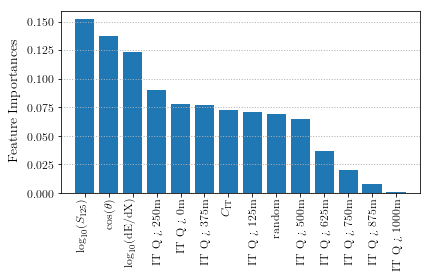

1) 0.342469394207
2) 0.279936134815
3) 0.250133037567
4) 0.127461418509


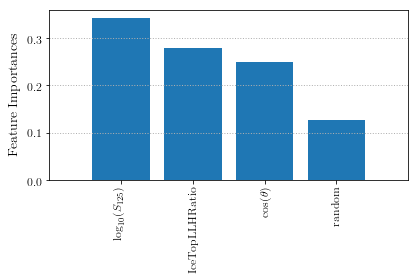

1) 0.367910921574
2) 0.321487158537
3) 0.310601919889


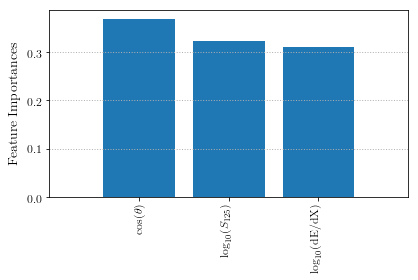

1) 0.357346534729
2) 0.348043054342
3) 0.294610381126


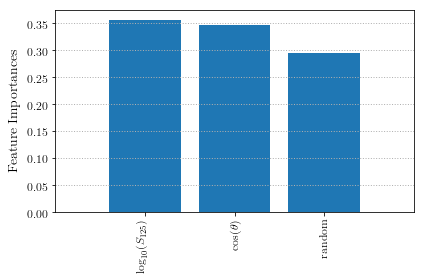

In [55]:
# for features in scan_features:
for idx, row in results.iterrows():

#     features_str = '-'.join(features)
#     results_basename = '{}-{}.pkl'.format(pipeline_str, features_str)
#     results_file = os.path.join(cwd,
#                                 'feature_scan_results',
#                                 results_basename)
#     results = joblib.load(results_file)

    importances = row['pipeline'].named_steps['classifier'].feature_importances_
    feature_labels = np.array(row['feature_labels'])
    plot_feature_importances(importances, feature_labels)

1) 0.195756226778
2) 0.169726133347
3) 0.156970143318
4) 0.126868993044
5) 0.0905008614063
6) 0.0838144570589
7) 0.0641993582249
8) 0.0574636086822
9) 0.0547002218664


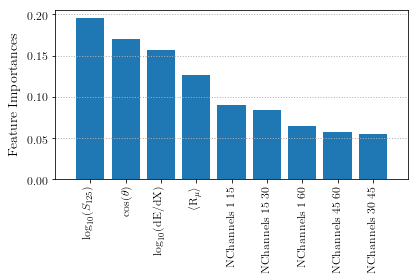

In [27]:
feature_labels = np.array(results['feature_labels'])
num_features = len(feature_labels)
importances = results['pipeline'].named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots()
for f in range(num_features):
    print('{}) {}'.format(f + 1, importances[indices[f]]))

plt.ylabel('Feature Importances')
plt.bar(range(num_features),
        importances[indices],
        align='center')

plt.xticks(range(num_features),
           feature_labels[indices],
           rotation=90)
plt.xlim([-1, num_features])
# plt.ylim([0, .40])
ax.grid(axis='y')
plt.show()

In [40]:
df_sim_train, df_sim_test = comp.load_sim(config=config,
                                          log_energy_min=energybins.log_energy_min,
                                          log_energy_max=energybins.log_energy_max,
                                          test_size=0.5,
                                          verbose=True)

[########################################] | 100% Completed |  2.6s


/home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator Pipeline from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [75]:
X = df_sim_train.loc[:, result['features']]

In [77]:
np.random.seed(2)
X['random'] = np.random.random(size=len(df_sim_train))
X = X.values

In [78]:
result

acc_mean_heavy     [0.6695401083730042, 0.7637845796821854, 0.824...
acc_mean_light     [0.6937751123788496, 0.6908672475929045, 0.655...
acc_std_heavy      [0.043536451016342716, 0.06200040833890916, 0....
acc_std_light      [0.028305817852188917, 0.03580184796522558, 0....
best_params        {u'classifier__learning_rate': 0.1, u'classifi...
config                                                     IC86.2012
feature_labels     ($\cos(\theta)$, $\log_{10}(S_{\mathrm{125}})$...
features           (lap_cos_zenith, log_s125, log_dEdX, NHits_1_6...
log_energy_bins    [6.1, 6.199999999999999, 6.299999999999999, 6....
num_groups                                                         2
pipeline           Pipeline(memory=None,\n     steps=[('classifie...
pipeline_name                        xgboost_comp_IC86.2012_2-groups
sklearn_version                                               0.19.1
source_code        /home/jbourbeau/cr-composition/feature_selecti...
Name: 7, dtype: object

In [80]:
y = df_sim_train.loc[:, 'comp_target_{}'.format(num_groups)].values
y

array([0, 1, 0, ..., 0, 0, 1])

In [83]:
train_scores, test_scores = validation_curve(result['pipeline'], X, y,
                                             param_name='classifier__max_depth',
                                             param_range=np.arange(1, 11),
                                             cv=3,
                                             scoring='accuracy',
                                             n_jobs=1,
                                             verbose=1)

KeyboardInterrupt: 

In [88]:
params = np.arange(1, 11)
df_cv = comp.cross_validate_comp(
                        df_sim_train, df_sim_test, pipeline_str,
                        param_name='max_depth', param_values=params,
                        feature_list=list(result['features']),
                        target='comp_target_{}'.format(num_groups),
                        scoring=zero_one_loss, num_groups=num_groups,
                        n_splits=10, verbose=True,
                        n_jobs=1)
#                         n_jobs=min(len(params), 15))

Performing 10-fold CV on 10 hyperparameter values (100 fits):
[                                        ] | 0% Completed |  0.3s


XGBoostError: [12:17:58] src/objective/regression_obj.cc:101: Check failed: preds.size() == info.labels.size() (0 vs. 31964) labels are not correctly providedpreds.size=0, label.size=31964

Stack trace returned 10 entries:
[bt] (0) /home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/xgboost/./lib/libxgboost.so(_ZN4dmlc15LogMessageFatalD1Ev+0x29) [0x7f0f5038ea99]
[bt] (1) /home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/xgboost/./lib/libxgboost.so(_ZN7xgboost3obj10RegLossObjINS0_22LogisticClassificationEE11GetGradientERKSt6vectorIfSaIfEERKNS_8MetaInfoEiPS4_INS_6detail18bst_gpair_internalIfEESaISE_EE+0x1aa) [0x7f0f5046dfaa]
[bt] (2) /home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/xgboost/./lib/libxgboost.so(_ZN7xgboost11LearnerImpl13UpdateOneIterEiPNS_7DMatrixE+0x362) [0x7f0f5039a722]
[bt] (3) /home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/xgboost/./lib/libxgboost.so(XGBoosterUpdateOneIter+0x2b) [0x7f0f503a22db]
[bt] (4) /home/jbourbeau/.virtualenvs/composition/lib/python2.7/lib-dynload/_ctypes.so(ffi_call_unix64+0x4c) [0x7f0f953c64dc]
[bt] (5) /home/jbourbeau/.virtualenvs/composition/lib/python2.7/lib-dynload/_ctypes.so(ffi_call+0x1f5) [0x7f0f953c5c35]
[bt] (6) /home/jbourbeau/.virtualenvs/composition/lib/python2.7/lib-dynload/_ctypes.so(_ctypes_callproc+0x3e6) [0x7f0f953bd2d6]
[bt] (7) /home/jbourbeau/.virtualenvs/composition/lib/python2.7/lib-dynload/_ctypes.so(+0x9d13) [0x7f0f953b4d13]
[bt] (8) /cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_6_x86_64/lib/libpython2.7.so.1.0(PyObject_Call+0x53) [0x7f0fa0946d03]
[bt] (9) /cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_6_x86_64/lib/libpython2.7.so.1.0(PyEval_EvalFrameEx+0x715d) [0x7f0fa09f968d]


In [11]:
clf = results['pipeline'].named_steps['classifier'].feature_importances_
clf.feature_importances_

array([0.16972613, 0.19575623, 0.15697014, 0.126869  , 0.06419936,
       0.09050086, 0.08381446, 0.05470022, 0.05746361], dtype=float32)

In [12]:
clf.classes_

array([0, 1])

In [14]:
clf.__dict__

{'_Booster': <xgboost.core.Booster at 0x7f1f55b67650>,
 '_features_count': 9,
 '_le': LabelEncoder(),
 'base_score': 0.5,
 'booster': 'gbtree',
 'classes_': array([0, 1]),
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'kwargs': {},
 'learning_rate': 0.025,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 1,
 'missing': nan,
 'n_classes_': 2,
 'n_estimators': 600,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}